In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

Leemos el dataset de los resultados

In [17]:
bt_resultados = pd.read_csv("resultados/resultado.csv");
bt_resultados.head()

,dataset,n,#locales,W,metodo,tiempo
0,densidad-alta-factibilidad,0,1,3,BT,0.000700
1,densidad-alta-factibilidad,1,2,6,BT,0.000677
2,densidad-alta-factibilidad,2,3,9,BT,0.000701
3,densidad-alta-factibilidad,3,4,12,BT,0.000928
4,densidad-alta-factibilidad,4,5,15,BT,0.000948


Experimentacion densidad alta para factibilidad:

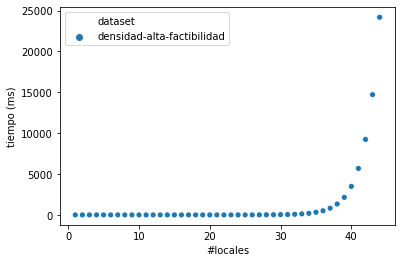

In [18]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT = bt_resultados[bt_resultados["metodo"]=="BT"].copy();
fig = sns.scatterplot(data=bt_complejidad_BT, x='#locales', y='tiempo', hue='dataset');
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades.svg");

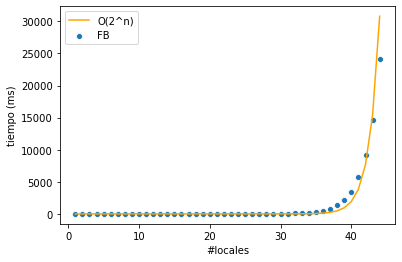

In [26]:
# Comparamos el dataset densidad-alta contra una función exponencial.
bt_complejidad_BT = bt_resultados[bt_resultados["metodo"]=="BT"].copy();
bt_complejidad_BT["tiempo_esperado"] = 2.0 ** bt_complejidad_BT["n"] * 0.0000000035; # Exponencial
fig = sns.scatterplot(data=bt_complejidad_BT, x='#locales', y='tiempo');
fig = sns.lineplot(data=bt_complejidad_BT, x='#locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad.svg")

Índice de correlación de Pearson: 0.9859584275207831


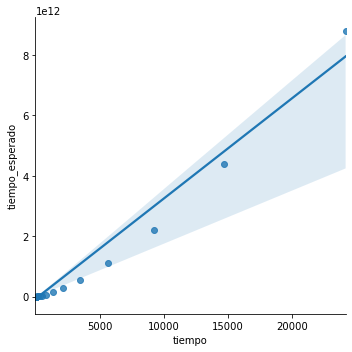

In [32]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
bt_complejidad_BT = bt_resultados[bt_resultados["metodo"]=="BT"].copy();
bt_complejidad_BT["tiempo_esperado"] = 2.0 ** bt_complejidad_BT["n"];
fig = sns.lmplot(data=bt_complejidad_BT, x="tiempo", y="tiempo_esperado");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(bt_complejidad_BT, "tiempo", "tiempo_esperado"));